# Winning a Kaggle Competition in Python

## Kaggle competitions process

### Explore train data

In [34]:
import pandas as pd

train = pd.read_csv('demand_forecasting_train_1_month.csv')

# Look at the shape of the data
print('Train shape:', train.shape)

train.head()

Train shape: (15500, 5)


,id,date,store,item,sales
0,100000,2017-12-01,1,1,19
1,100001,2017-12-02,1,1,16
2,100002,2017-12-03,1,1,31
3,100003,2017-12-04,1,1,7
4,100004,2017-12-05,1,1,20


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      15500 non-null  int64 
 1   date    15500 non-null  object
 2   store   15500 non-null  int64 
 3   item    15500 non-null  int64 
 4   sales   15500 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 605.6+ KB


In [6]:
train.memory_usage(deep=True)

Index        128
id        124000
date     1038500
store     124000
item      124000
sales     124000
dtype: int64

### Explore test data

In [7]:
test = pd.read_csv('demand_forecasting_test.csv')

# Print train and test columns
print('Train columns:', train.columns.tolist())
print('Test columns:', test.columns.tolist())

Train columns: ['id', 'date', 'store', 'item', 'sales']
Test columns: ['id', 'date', 'store', 'item']


In [8]:
sample_submission = pd.read_csv('sample_submission_demand.csv')

sample_submission.head()

,id,sales
0,0,52
1,1,52
2,2,52
3,3,52
4,4,52


### Train a simple model

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Train a model
rf.fit(X=train[['store', 'item']], y=train['sales'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Prepare a submission

In [10]:
# Get predictions for the test set
test['sales'] = rf.predict(test[['store', 'item']])

# Write test predictions using the sample_submission format
test[['id', 'sales']].to_csv('kaggle_submission.csv', index=False)

### Explore overfitting XGBoost

In [11]:
train = pd.read_csv('train.csv')

In [12]:
train.shape

(913000, 4)

In [13]:
dates =['2017-11-01',
 '2017-11-02',
 '2017-11-03',
 '2017-11-04',
 '2017-11-05',
 '2017-11-06',
 '2017-11-07',
 '2017-11-08',
 '2017-11-09',
 '2017-11-10',
 '2017-11-11',
 '2017-11-12',
 '2017-11-13',
 '2017-11-14',
 '2017-11-15',
 '2017-11-16',
 '2017-11-17',
 '2017-11-18',
 '2017-11-19',
 '2017-11-20',
 '2017-11-21',
 '2017-11-22',
 '2017-11-23',
 '2017-11-24',
 '2017-11-25',
 '2017-11-26',
 '2017-11-27',
 '2017-11-28',
 '2017-11-29',
 '2017-11-30']

In [14]:
trim_train = train[train.date.apply(lambda x: x in dates)]

In [15]:
trim_train.shape

(15000, 4)

In [16]:
trim_train.head()

,date,store,item,sales
1765,2017-11-01,1,1,16
1766,2017-11-02,1,1,21
1767,2017-11-03,1,1,18
1768,2017-11-04,1,1,34
1769,2017-11-05,1,1,23


In [17]:
dates_test = ['2017-12-01',
 '2017-12-02',
 '2017-12-03',
 '2017-12-04',
 '2017-12-05',
 '2017-12-06',
 '2017-12-07',
 '2017-12-08',
 '2017-12-09',
 '2017-12-10',
 '2017-12-11',
 '2017-12-12',
 '2017-12-13',
 '2017-12-14',
 '2017-12-15',
 '2017-12-16',
 '2017-12-17',
 '2017-12-18',
 '2017-12-19',
 '2017-12-20',
 '2017-12-21',
 '2017-12-22',
 '2017-12-23',
 '2017-12-24',
 '2017-12-25',
 '2017-12-26',
 '2017-12-27',
 '2017-12-28',
 '2017-12-29',
 '2017-12-30',
 '2017-12-31']

In [18]:
trim_test = train[train.date.apply(lambda x: x in dates_test)]

In [19]:
trim_test.shape

(15500, 4)

In [20]:
trim_test.head()

,date,store,item,sales
1795,2017-12-01,1,1,19
1796,2017-12-02,1,1,16
1797,2017-12-03,1,1,31
1798,2017-12-04,1,1,7
1799,2017-12-05,1,1,20


### Train XGBoost models

In [21]:
import xgboost as xgb

# Create DMatrix on train data
dtrain = xgb.DMatrix(data=trim_train[['store', 'item']],
                     label=trim_train['sales'])

# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 2,
          'silent': 1}

# Train xgboost model
xg_depth_2 = xgb.train(params=params, dtrain=dtrain)

In [22]:
# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 8,
          'silent': 1}

# Train xgboost model
xg_depth_8 = xgb.train(params=params, dtrain=dtrain)

In [23]:
# Define xgboost parameters
params = {'objective': 'reg:linear',
          'max_depth': 15,
          'silent': 1}

# Train xgboost model
xg_depth_15 = xgb.train(params=params, dtrain=dtrain)

In [24]:
from sklearn.metrics import mean_squared_error

dtest = xgb.DMatrix(data=trim_test[['store', 'item']])

# For each of 3 trained models
for model in [xg_depth_2, xg_depth_8, xg_depth_15]:
    # Make predictions
    train_pred = model.predict(dtrain)     
    test_pred = model.predict(dtest)          
    
    # Calculate metrics
    mse_train = mean_squared_error(trim_train['sales'], train_pred)                  
    mse_test = mean_squared_error(trim_test['sales'], test_pred)
    print('MSE Train: {:.3f}. MSE Test: {:.3f}. Diff:  {:.3f} '.format(mse_train, mse_test, mse_train - mse_test))

MSE Train: 631.275. MSE Test: 558.522. Diff:  72.753 
MSE Train: 183.771. MSE Test: 337.337. Diff:  -153.566 
MSE Train: 134.984. MSE Test: 355.534. Diff:  -220.550 


## Dive into the Competition

### Define a competition metric

In [27]:
y_regression_pred = xg_depth_2.predict(dtrain)

In [30]:
y_regression_true = train_pred.copy()

In [31]:
import numpy as np

from sklearn.metrics import mean_squared_error

def own_mse(y_true, y_pred):
  	# Raise differences to the power of 2
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err

print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(y_regression_true, y_regression_pred)))
print('Your MSE: {:.5f}. '.format(own_mse(y_regression_true, y_regression_pred)))

Sklearn MSE: 431.61481. 
Your MSE: 431.61481. 


In [ ]:
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
  	# Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms) 
    return -err

print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

### EDA statistics

In [45]:
import matplotlib.pyplot as plt

In [48]:
train = pd.read_csv('train 2.csv', nrows=5000)

In [49]:
train

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
4995,2010-09-04 12:45:32.0000001,6.5,2010-09-04 12:45:32 UTC,-73.980622,40.745157,-73.975777,40.755863,1
4996,2011-06-13 10:53:52.0000006,4.9,2011-06-13 10:53:52 UTC,-73.956664,40.766989,-73.961371,40.772639,1
4997,2013-12-12 21:26:40.0000004,7.5,2013-12-12 21:26:40 UTC,-73.988707,40.734343,-73.991737,40.722582,1
4998,2010-03-08 14:01:00.00000067,7.7,2010-03-08 14:01:00 UTC,-73.952795,40.776642,-73.965320,40.759412,5


In [50]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

In [52]:
train.to_csv('taxi_train_5000.csv', index=None)

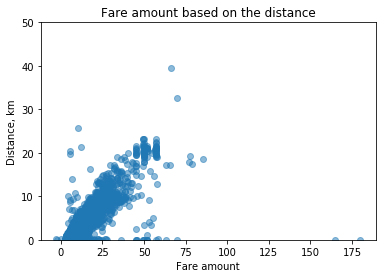

In [51]:
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)
plt.show()

In [53]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

In [54]:
hour_price.head()

,hour,fare_amount
0,0,10.0
1,1,10.0
2,2,8.5
3,3,8.5
4,4,10.7


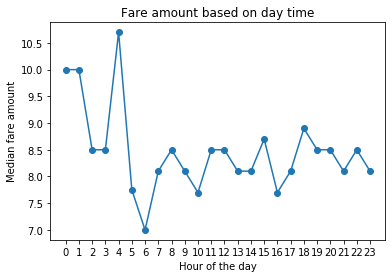

In [55]:
# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

### K-fold cross-validation

In [81]:
train = pd.read_json('rental_listing_inquiries_train.json')

In [82]:
train = train.loc[:,['bathrooms', 'bedrooms','building_id', 'latitude', 'longitude', 'manager_id', 'price', 'interest_level']]

In [83]:
train.head()

,bathrooms,bedrooms,building_id,latitude,longitude,manager_id,price,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,40.7108,-73.9539,a10db4590843d78c784171a107bdacb4,2400,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,40.7513,-73.9722,955db33477af4f40004820b4aed804a0,3800,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,40.7575,-73.9625,c8b10a317b766204f08e613cef4ce7a0,3495,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,40.7439,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,2795,low


In [101]:
price_counts = np.unique(train.price, return_counts=True)

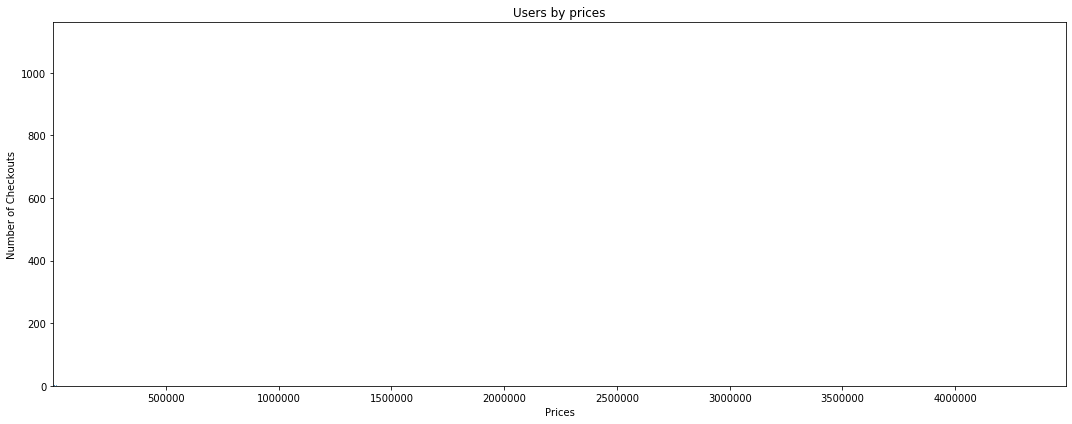

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(price_counts[0], price_counts[1], align='center', width=3, alpha=0.6)
ax.set_xlim([price_counts[0].min(), price_counts[0].max()])
ax.set_xlabel('Prices')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Users by prices')

plt.tight_layout()

In [69]:
train = train.sample(1000)

In [70]:
from sklearn.model_selection import KFold # random sampling

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in kf.split(train):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 8)
Medium interest listings in CV train: 135

Fold: 1
CV train shape: (667, 8)
Medium interest listings in CV train: 150

Fold: 2
CV train shape: (667, 8)
Medium interest listings in CV train: 149



if we look at the number of medium-interest listings, it's varying from 135 to 150 from one fold to another. To make them uniform among the folds, let's use Stratified K-fold!

### Stratified K-fold

In [71]:
# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0
for train_index, test_index in str_kf.split(train, train['interest_level']):
    # Obtain training and testing folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 8)
Medium interest listings in CV train: 144

Fold: 1
CV train shape: (667, 8)
Medium interest listings in CV train: 145

Fold: 2
CV train shape: (667, 8)
Medium interest listings in CV train: 145



now we see that both size and target distribution are the same among the folds. The general rule is to prefer Stratified K-Fold over usual K-Fold in any classification problem.

### Time K-fold

In [104]:
train = trim_test.copy()

In [105]:
from sklearn.model_selection import TimeSeriesSplit

In [106]:
# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# Sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31



### Overall validation score

In [115]:
def get_fold_mse(train, kf):
    mse_scores = []
    
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.iloc[train_index], train.iloc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        
    return mse_scores

In [116]:
# Sort train data by date
train = train.sort_values('date')

# Initialize 3-fold time cross-validation
kf = TimeSeriesSplit(n_splits=3)

In [117]:
# Get MSE scores for each cross-validation split
mse_scores = get_fold_mse(train, kf)

print('Mean validation MSE: {:.5f}'.format(np.mean(mse_scores)))

Mean validation MSE: 88.31878


In [118]:
print('MSE by fold: {}'.format(mse_scores))

MSE by fold: [90.52281, 83.95721, 90.47631]


In [119]:
print('Overall validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

Overall validation MSE: 91.40293


## Feature Engineering